In [1]:
### 퍼셉트론과 신경망의 가장 큰 차이점 : 활성화 함수
### 퍼셉트론의 활성화 함수 : 계단 함수
### 신경망의 활성화 함수 : 시그모이드 함수, ReLU 함수와 같이 매끈한 함수

### 3.2.2 계단 함수 구현하기

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### x = 넘파이 배열 (np.array) 불가능
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [5]:
step_function(np.array[1.0,2.0])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [26]:
def step_function(x):
    y = x > 0
    return y.astype(np.int64)

In [27]:
step_function(np.array([-1.0, 1.0, 2.0]))

array([0, 1, 1])

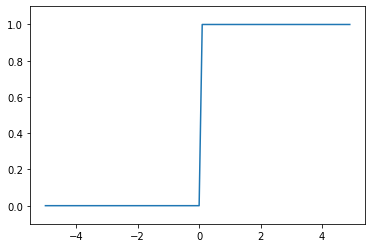

In [28]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [32]:
### 브로드캐스트 떄문에 넘파이 배열 계산 가능
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [36]:
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [37]:
### 브로드캐스트 예시
t = np.array([1.0, 2.0, 3.0])
print(1 + t)
print(1/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


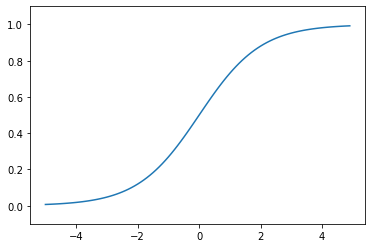

In [35]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

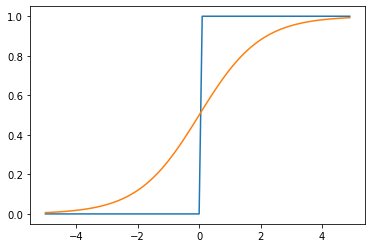

In [40]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

### 3.2.7 ReLU 함수

In [43]:
def relu(x):
    return np.maximum(0,x)

In [44]:
x = np.array([3.14,-27,5.2])
relu(x)

array([3.14, 0.  , 5.2 ])

### 3.3.1 다차원 배열

In [50]:
### 1차원 배열 : 벡터
A = np.array([1,2,3,4])
print(A)

np.ndim(A)
A.shape
A.shape[0]

[1 2 3 4]


4

In [53]:
### 2차원 배열 : 행렬
B = np.array([[1,2],[3,4],[5,6]])
print(B)

np.ndim(B)
B.shape

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

### 3.3.2 행렬의 곱

In [56]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

A.shape, B.shape
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [58]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])

A.shape, B.shape
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [60]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])

A.shape, B.shape
np.dot(A,B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

In [64]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

X.shape, W.shape
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


### 3.4.2 각 층의 신호 전달 구현하기

In [71]:
### 입력층 -> 1층
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

X.shape, W1.shape, B1.shape

A1 = np.dot(X,W1) + B1
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [76]:
### 1층 -> 2층
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

Z1.shape, W2.shape, B2.shape

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [84]:
def identity_function(x):
    return x

In [85]:
### 2층 -> 출력층
### 출력층의 활성화 함수 (시그마) : 회귀 - 항등 함수 / 2클래스 분류 - 시그모이드 함수 / 다중 클래스 분류 - 소프트맥스 함수 사용
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

Z2.shape, W3.shape, B3.shape

A3 = np.dot(Z2, W3) + B3
y = identity_function(A3)

### 3.4.3 구현 정리

In [90]:
### init_network : 매개변수의 값 저장
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

In [98]:
### 입력값 -> 출력값 변환
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(A3)
    return y

In [99]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [ ]:
### 회귀 모형의 출력층의 활성화 함수 : 항등 함수
### 분류 모형의 출력층의 활성화 함수 : 소프트맥스 함수

In [104]:
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
exp_a_sum = np.sum(exp_a)

y = exp_a / exp_a_sum

In [105]:
def softmax(a):
    exp_a = np.exp(a)
    exp_a_sum = np.sum(exp_a)
    y = exp_a / exp_a_sum
    
    return y

In [109]:
a = np.array([0.3,2.9,4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [112]:
### 소프트맥수 함수의 오버플로우(overflow) 문제점을 해결하기 위한 방법
a = np.array([1010,1000,990])
np.exp(a) / np.sum(np.exp(a))

### a의 배열 중 최댓값을 빼주면 오버플로우의 문제 해결 가능
c = np.max(a)
np.exp(a-c) / np.sum(np.exp(a-c))

/var/folders/bp/f4_wyqts1wq7j3vmy_06yxxc0000gn/T/ipykernel_10099/599026087.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/var/folders/bp/f4_wyqts1wq7j3vmy_06yxxc0000gn/T/ipykernel_10099/599026087.py:3: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [113]:
### 오버플로우 개선한 소프트맥수 함수
def softmax(a):
    c = np.max(a)
    y = np.exp(a-c) / np.sum(np.exp(a-c))
    return y

In [116]:
a = np.array([0.3, 2.9, 4.0])
print(softmax(a))
print(np.sum(softmax(a)))

[0.01821127 0.24519181 0.73659691]
1.0


### 3.6.1 MNIST 데이터셋

In [5]:
### deep-learning-from-scratch-master에 ch03에 직접 구현한 자료 있음